*Analísis exploratorio de datos*

In [4]:
#importacion de datos
import pandas as pd
dataset = pd.read_excel("data/BASE DE DATOS PCC.xlsx")
dataset.head(10)

,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000,2024-01-28 12:07:29,2024-01-28 12:35:45,00:28:16,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-28 11:49:01,2024-01-28 12:07:29,00:18:28,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000,2024-01-29 07:29:18,2024-01-29 08:18:30,00:49:12,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-29 06:53:59,2024-01-29 07:29:18,00:35:19,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660,2023-08-24 00:15:33,2023-08-24 00:49:30,00:33:57,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0,2023-08-24 00:11:56,2023-08-24 00:15:33,00:03:37,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200,2023-08-28 00:31:58,2023-08-28 01:01:06,00:29:08,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320,2023-08-28 01:56:18,2023-08-28 02:28:50,00:32:32,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-27 22:41:15,2023-08-27 23:59:59,01:18:44,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-28 00:00:00,2023-08-28 00:18:40,00:18:40,18.67,No,2.0


In [5]:
#Descripcion de datos
dataset.describe().style.background_gradient(cmap = "plasma")

,Pedido,OP,Duración [min],Info. Extra 1
count,23651.000000,23651.000000,23649.000000,23590.000000
mean,29108.328189,10384.506025,63.043219,11.435566
std,852.693763,867.892852,57.925490,13.725752
min,25301.000000,6362.000000,0.070000,1.000000
25%,28492.000000,9772.000000,21.950000,4.000000
50%,29158.000000,10445.000000,45.280000,6.000000
75%,29791.500000,11081.000000,85.630000,16.000000
max,30623.000000,11899.000000,499.480000,160.000000


*Algunos datos de duración están vacíos*

In [6]:
#Descripcion de las variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pedido          23651 non-null  int64  
 1   OP              23651 non-null  int64  
 2   Referencia      23651 non-null  object 
 3   Maquina         23651 non-null  object 
 4   Sección         23651 non-null  object 
 5   Proceso         23651 non-null  object 
 6   Usuario         23651 non-null  object 
 7   Estado          23651 non-null  object 
 8   Fabricadas      23651 non-null  object 
 9   Fecha inicio    23651 non-null  object 
 10  Fecha fin       23651 non-null  object 
 11  Duración        23651 non-null  object 
 12  Duración [min]  23649 non-null  float64
 13  Ayudante        23651 non-null  object 
 14  Info. Extra 1   23590 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.7+ MB


*Los datos como las fechas inicio y fin deben ser transformadas en timestamps para poder ser procesadas correctamente en caso de querer hacer operaciones con ellas (en este momento son objetos para el dataset, posiblemente reconocidas como texto)* *Otras variables pueden ser analizadas para ser transformadas en dummies, como usuario o estado.* **No se tienen valores nulos en las variables**

In [7]:
#Buscar por valores duplicados
dataset.duplicated().sum()

0

**No se tienen valores duplicados en la base de datos**

In [12]:
#Verificar por posibles variantes sin variacion
single_unique = dataset.nunique()
single_unique

Pedido             3092
OP                 3128
Referencia          842
Maquina              13
Sección               3
Proceso              17
Usuario              34
Estado                2
Fabricadas         3820
Fecha inicio      23131
Fecha fin         23125
Duración           9062
Duración [min]     9117
Ayudante              1
Info. Extra 1        42
dtype: int64

**Análisis preliminar de los datos**

*La variable **Ayudante** no tiene variabilidad*

*La variable **Estado** es binaria**

*La base de datos solo muestra información sobre 3 secciones distintas de la empresa*

*La empresa posee 13 máquinas distintas*

*Produjo 842 referencias distintas de productos en la ventana de tiempo en la que se registraron los datos*

*La empresa realiza 17 procesos distintos en la producción*

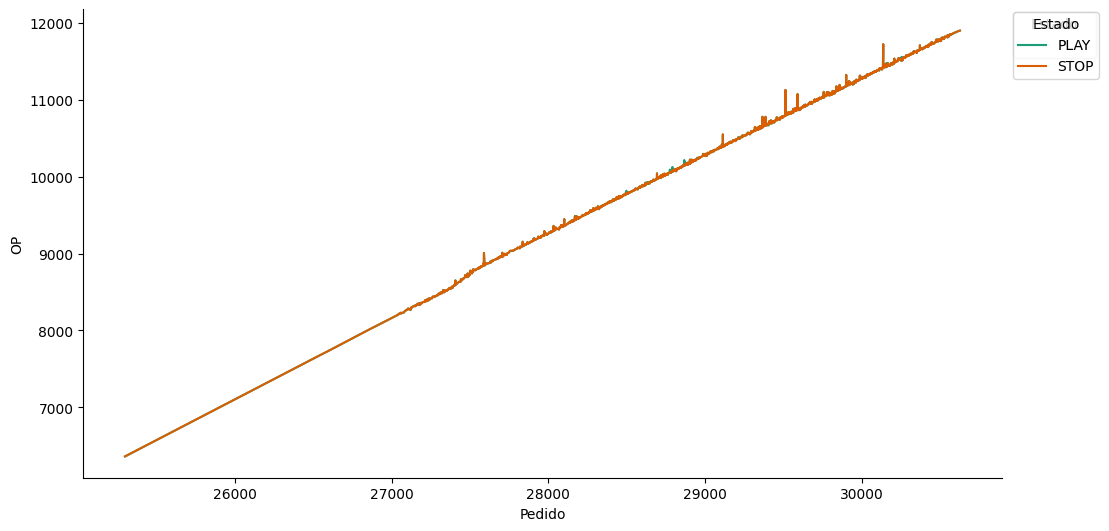

In [14]:
# @title Pedido vs OP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Pedido']
  ys = series['OP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Pedido', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pedido')
_ = plt.ylabel('OP')

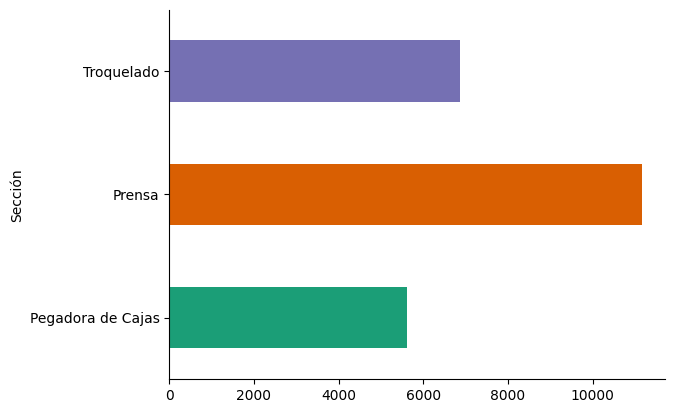

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Sección').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)